<div style="display: flex; text-align:center; background-color: RGB( 254, 249, 231 );border: 1px solid RGB(51,165,182);" >
<h1 style="margin: auto; padding: 30px;margin-left: 2em; text-indent: -2em"><font color="#475AFF">Correlation entre l'âge des clients et la taille du panier moyen</font>
</h1>
</div>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
pd.set_option('display.max_rows', None)

In [2]:
data_paniers = pd.read_csv("./DATA/cleaned/data_paniers.csv")
data_paniers.head()

,session_id,montant_dupanier,nombre_article,client_id,age,birth,sex,month,day,date
0,s_1,11.99,1,c_329,55.0,1967.0,f,2021-03,2021-03-01,2021-03-01 00:01:07.843138
1,s_10,26.99,1,c_2218,52.0,1970.0,f,2021-03,2021-03-01,2021-03-01 00:10:33.163037
2,s_100,33.72,2,c_3854,44.0,1978.0,f,2021-03,2021-03-01,2021-03-01 04:12:43.572994
3,s_1000,39.22,4,c_1014,33.0,1989.0,m,2021-03,2021-03-03,2021-03-03 02:38:09.568389
4,s_10000,41.49,3,c_476,33.0,1989.0,f,2021-03,2021-03-22,2021-03-22 17:46:05.819130


In [3]:
data_paniers.loc[data_paniers.client_id=='c_329',['client_id','nombre_article']].head()

,client_id,nombre_article
0,c_329,1
1270,c_329,1
21262,c_329,1
23773,c_329,1
65811,c_329,2


In [4]:
df_paniers = data_paniers.groupby("client_id", as_index=False).agg(taillePanierMoyen=("nombre_article","mean"))
d = data_paniers[['client_id','age']]
df_paniers = df_paniers.merge(d,on='client_id')
df_paniers.drop_duplicates(keep='first',inplace=True)
df_paniers.head()

,client_id,taillePanierMoyen,age
0,c_1,1.181818,67.0
33,c_10,1.705882,66.0
67,c_100,1.600000,30.0
72,c_1000,1.344086,56.0
165,c_1001,2.170213,40.0


### HYPOTHESE DE NORMALITE

### Normalite de la distribution des Ages

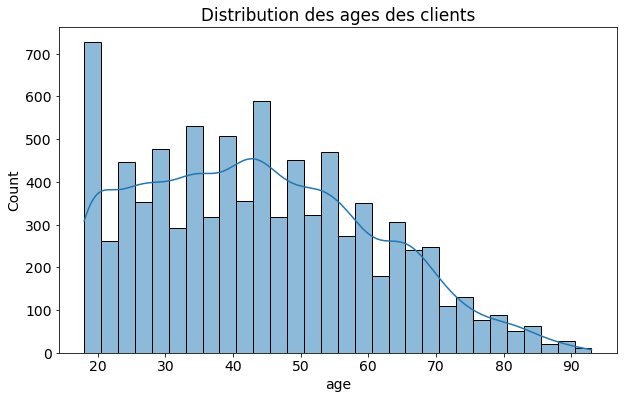

In [5]:
fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.histplot(df_paniers['age'],kde=True)
plt.title("Distribution des ages des clients")
plt.show()
fig.savefig('./GRAPHIQUES/Correlation_age_taillePanierMoyen/Distribution des ages-panierMoyen.png',dpi=fig.dpi*10)
plt.close(fig)

In [6]:
data_paniers['age'].describe()

count    342315.000000
mean         45.838660
std          14.900547
min          18.000000
25%          35.000000
50%          44.000000
75%          55.000000
max          93.000000
Name: age, dtype: float64

In [7]:
# shapiro-wilk test
# H0 : la distribution des ages suit une distribution normale
# H1 : la distribution des ages ne suit pas une distribution normale
res_shap=st.shapiro(df_paniers['age'])
print('statistic=%.3f, pvalue=%.3f' % (res_shap.statistic, res_shap.pvalue))

statistic=0.970, pvalue=0.000


C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des ages ne suit donc pas une distribution normale .

In [8]:
# kolmogorov-smirnov
# H0 : la distribution des ages suit une distribution normale
# H1 : la distribution des ages ne suit pas une distribution normale
rng = np.random.default_rng()
sample2 = st.norm.rvs(size=342, random_state=rng)
res = st.ks_2samp(df_paniers['age'], sample2,alternative='two-sided')
print('statistic=%.3f, pvalue=%.3f' % (res.statistic, res.pvalue))

statistic=1.000, pvalue=0.000


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des ages ne suit donc pas une distribution normale .

### Normalite de la distribution des tailles de paniers

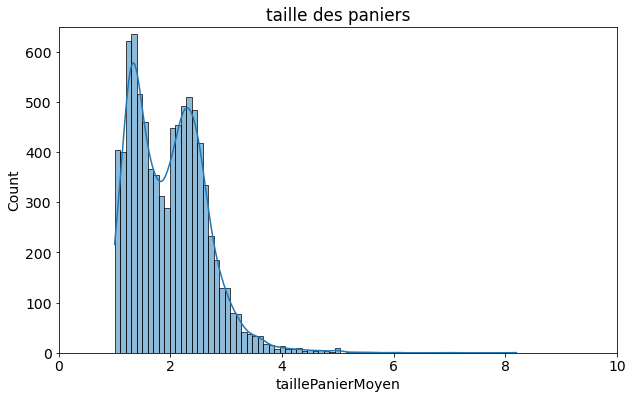

In [9]:

fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})
sns.histplot(df_paniers['taillePanierMoyen'],kde=True)
plt.xlim(0, 10)
plt.ylim(0, 650)
plt.title("taille des paniers")
plt.show()
fig.savefig('./GRAPHIQUES/Correlation_age_taillePanierMoyen/Distribution des tailles de paniers moyen.png',dpi=fig.dpi*10)
plt.close(fig)

In [10]:
# shapiro-wilk test
# H0 : la distribution de la taille des paniers suit une distribution normale
# H1 : la distribution de la taille des paniers ne suit pas une distribution normale
res_shap=st.shapiro(df_paniers['taillePanierMoyen'])
print('statistic=%.3f, pvalue=%.3f' % (res_shap.statistic, res_shap.pvalue))

statistic=0.941, pvalue=0.000


C:\Users\yteki\AppData\Roaming\Python\Python39\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des tailles de paniers ne suit donc pas une distribution normale .

In [11]:
# kolmogorov-smirnov
# H0 : la distribution des tailles de paniers suit une distribution normale
# H1 : la distribution des tailles de paniers ne suit pas une distribution normale
rng = np.random.default_rng()
sample2 = st.norm.rvs(size=342, random_state=rng)
res = st.ks_2samp(df_paniers['taillePanierMoyen'], sample2,alternative='two-sided')
print('statistic=%.3f, pvalue=%.3f' % (res.statistic, res.pvalue))

statistic=0.836, pvalue=0.000


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% . La distribution des tailles des paniers ne suit donc pas une distribution normale .

### TEST DE SPEARMAN

In [12]:
# Spearmanr correlation test
# H0 : les variables sont independantes
# H1 : les variables sont dependantes
res_spearman =st.spearmanr(df_paniers['age'],df_paniers['taillePanierMoyen'])
print('statistic=%.3f, pvalue=%.3f' % ( res_spearman.correlation , res_spearman.pvalue))



statistic=-0.207, pvalue=0.000


La p-value (0.000 ) est nettement inferieure à 0.05 , on rejette donc l'hypothèse nulle au seuil de 5% .
On conclue que Âge des clients et la taille du panier moyen sont
##### dependantes .

In [13]:
slope, intercept, r_value, p_value, std_err = st.linregress(df_paniers['age'],
                                                            df_paniers['taillePanierMoyen'])
fig = plt.figure(figsize=(10,6))
plt.rcParams.update({'font.size': 14})

sns.scatterplot(data=df_paniers, x='age', y='taillePanierMoyen')

plt.ylabel('Taille des paniers moyen')

plt.xlabel('Age')

plt.grid()

plt.xlim(15, 100)
plt.ylim(0,10)

plt.legend(bbox_to_anchor=(1, 1.02))

plt.title("Nuage de points age de client/ taille des paniers moyen")
fitLine = slope * df_paniers['age'] + intercept

plt.plot(df_paniers['age'], fitLine, c='r')
fig.savefig('./GRAPHIQUES/Correlation_age_taillePanierMoyen/Nuage_de_point_age_taillePaniers.png',dpi=fig.dpi*10)
plt.close(fig)

No handles with labels found to put in legend.


### MERCI DE VOTRE ATTENTION